# Análise de diversidade em cursos de TI da Bahia

## Imports e junção de bases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')

# Funções utilizadas

In [2]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

replace_map = {
    'TP_SITUACAO': {2: "Cursando",
                    3: "Matrícula trancada",
                    4: "Desvinculado do curso",
                    5: "Transferido para outro \n curso da mesma IES",
                    6: "Formado",
                    7: "Falecido"},
    'TP_SEXO' : {1: "Feminino", 2: "Masculino"}
}

colors = [(0.62, 0.0, 0.26), (0.89, 0.32, 0.29), (0.99, 0.65, 0.36), (1, 0.90, 0.44), (0.59, 0.73, 0.38), (0.64, 0.85, 0.64), (0.28, 0.63, 0.70), (0.37, 0.31, 0.64)]
cm = LinearSegmentedColormap.from_list('Spectral', colors)

def bar_plot_lines(dataframe, param1, param2, param3, param4, colormap=""):
    df = dataframe[[param1, param2]]

    data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
    data = data.replace(replace_map)

    if colormap != "":
    # colormap = plt.cm.nipy_spectral
    # colors = [colormap(i) for i in np.linspace(0, 1, len(df[param2].unique()))]
      data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
            .plot.bar(rot=0, figsize=(25, 10), colormap=colormap, fontsize=16, width=0.9, linestyle="--") \
            .legend(prop={'size': 20})
    else:
        data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
        
    plt.ylabel(param3, fontsize = 20)
    plt.xlabel(param4, fontsize = 20)

    xposition = [0.5 + i for i in range(len(df[param1].unique()))]
    for xc in xposition:
        plt.axvline(x=xc, color='gray', linestyle=':')
    
def bar_plot_lines_stacked_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30), sort_params=['Feminino', 'Masculino']):
    df = dataframe[[param1, param2]]

    data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
    )
    data = data.replace(replace_map)

    data.groupby(param2)[param1].value_counts().unstack(0).sort_values(by=sort_params).plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", stacked=True, xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]).legend(prop={'size': 12})
    plt.ylabel(param3, fontsize = 16)
    plt.xlabel(param4, fontsize = 16)
    xposition = [10 + (i)*10 for i in range(tick_amout//10)]


def bar_plot_lines_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30)):
    df = dataframe[[param1, param2]]

    data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
    )
    data = data.replace(replace_map)

    data.groupby(param2)[param1].value_counts().unstack(0)\
    .plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]) \
    .legend(prop={'size': 12})
    plt.ylabel(param3, fontsize = 16)
    plt.xlabel(param4, fontsize = 16)
    xposition = [10 + (i)*10 for i in range(tick_amout//10)]

# Análises

In [3]:
curso_presencial_BA = pd.read_csv('dataset/alunos_curso_2015_2019_tic_BA.csv')
curso_presencial_BA .head()

NU_ANO_CENSO  CO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0          2015     578                          1.0   
1          2015     578                          1.0   
2          2015     578                          1.0   
3          2015     578                          1.0   
4          2015     578                          1.0   

   TP_ORGANIZACAO_ACADEMICA  CO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                       1.0   13277.0            NaN       4.0   
1                       1.0   13277.0            NaN       4.0   
2                       1.0   13277.0            NaN       4.0   
3                       1.0   13277.0            NaN       4.0   
4                       1.0   13277.0            NaN       4.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                   1.0                 1.0  ...   
1                1.0                   1.0                 1.0  ...   
2                1.0                   1.0                 1.0  ...   
3                1.0                   1.0                 1.0  ...   
4                1.0                   1.0                 1.0  ...   

  CO_PAIS_DESTINO IN_MATRICULA  IN_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN          1.0            0.0                0.0   
1             NaN          1.0            0.0                0.0   
2             NaN          1.0            0.0                0.0   
3             NaN          1.0            0.0                0.0   
4             NaN          1.0            0.0                0.0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  \
0                    0.0                            NaN           2013.0   
1                    0.0                            NaN           2013.0   
2                    0.0                            NaN           2013.0   
3                    0.0                            NaN           2013.0   
4                    0.0                            NaN           2013.0   

   CO_UF               NO_CURSO  SG_IES  
0     29  CIÊNCIA DA COMPUTAÇÃO    UFBA  
1     29  CIÊNCIA DA COMPUTAÇÃO    UFBA  
2     29  CIÊNCIA DA COMPUTAÇÃO    UFBA  
3     29  CIÊNCIA DA COMPUTAÇÃO    UFBA  
4     29  CIÊNCIA DA COMPUTAÇÃO    UFBA  

[5 rows x 108 columns]

In [4]:
curso_brasil = pd.read_csv('dataset/alunos_curso_2015_2019_tic_br.csv')
curso_brasil.head()

C:\Users\solen\AppData\Local\Temp\ipykernel_14240\2211122185.py:1: DtypeWarning: Columns (10,11,41,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  curso_brasil = pd.read_csv('dataset/alunos_curso_2015_2019_tic_br.csv')


NU_ANO_CENSO  CO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0          2015     572                          1.0   
1          2015     572                          1.0   
2          2015     572                          1.0   
3          2015     572                          1.0   
4          2015     572                          1.0   

   TP_ORGANIZACAO_ACADEMICA  CO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                       1.0   82799.0            NaN       4.0   
1                       1.0   82799.0            NaN       4.0   
2                       1.0   82799.0            NaN       4.0   
3                       1.0   82799.0            NaN       4.0   
4                       1.0   82799.0            NaN       4.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                   1.0                 1.0  ...   
1                1.0                   1.0                 1.0  ...   
2                1.0                   1.0                 1.0  ...   
3                1.0                   1.0                 1.0  ...   
4                1.0                   1.0                 1.0  ...   

  CO_PAIS_DESTINO IN_MATRICULA  IN_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN          1.0            0.0                0.0   
1             NaN          1.0            0.0                0.0   
2             NaN          1.0            0.0                0.0   
3             NaN          1.0            0.0                0.0   
4             NaN          1.0            0.0                0.0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  \
0                    0.0                            NaN           2008.0   
1                    0.0                            NaN           2011.0   
2                    0.0                            NaN           2009.0   
3                    0.0                            NaN           2009.0   
4                    0.0                            NaN           2009.0   

   CO_UF               NO_CURSO  SG_IES  
0     33  CIÊNCIA DA COMPUTAÇÃO     UFF  
1     33  CIÊNCIA DA COMPUTAÇÃO     UFF  
2     33  CIÊNCIA DA COMPUTAÇÃO     UFF  
3     33  CIÊNCIA DA COMPUTAÇÃO     UFF  
4     33  CIÊNCIA DA COMPUTAÇÃO     UFF  

[5 rows x 108 columns]

In [5]:
display(curso_brasil['TP_CATEGORIA_ADMINISTRATIVA'].unique())

array([ 1.,  4.,  5.,  7.,  2.,  3., nan])

In [6]:
display(curso_brasil['TP_CATEGORIA_ADMINISTRATIVA'].value_counts())

4.0    1218032
5.0     766828
1.0     524323
2.0     275224
3.0      15397
7.0      11168
Name: TP_CATEGORIA_ADMINISTRATIVA, dtype: int64

In [7]:
deficiencias = [
    'IN_DEFICIENCIA',
# 'IN_DEFICIENCIA_AUDITIVA',
# 'IN_DEFICIENCIA_FISICA',
# 'IN_DEFICIENCIA_INTELECTUAL',
# 'IN_DEFICIENCIA_MULTIPLA',
# 'IN_DEFICIENCIA_SURDEZ',
# 'IN_DEFICIENCIA_SURDOCEGUEIRA',
# 'IN_DEFICIENCIA_BAIXA_VISAO',
# 'IN_DEFICIENCIA_CEGUEIRA',
# 'IN_DEFICIENCIA_SUPERDOTACAO',
# 'IN_TGD_AUTISMO',
# 'IN_TGD_SINDROME_ASPERGER',
# 'IN_TGD_SINDROME_RETT',
# 'IN_TGD_TRANSTOR_DESINTEGRATIVO'
]

In [8]:
display(curso_brasil['IN_DEFICIENCIA'].unique())
display(curso_brasil['IN_DEFICIENCIA'].value_counts())


array([ 0.,  9.,  1., nan])

0.0    2606590
9.0     186262
1.0      18120
Name: IN_DEFICIENCIA, dtype: int64

In [9]:
display(curso_presencial_BA['IN_DEFICIENCIA'].unique())
display(curso_presencial_BA['IN_DEFICIENCIA'].value_counts())

array([0., 1., 9.])

0.0    14343
9.0     3926
1.0      145
Name: IN_DEFICIENCIA, dtype: int64

In [10]:
df_def = curso_brasil.loc[(curso_brasil.IN_DEFICIENCIA == 1) &
                (curso_brasil.NU_ANO_CENSO >= 2015) &
                (curso_brasil.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (curso_brasil.TP_MODALIDADE_ENSINO == 1)
                ]
df_no_def = curso_brasil.loc[(curso_brasil.IN_DEFICIENCIA == 0) &
                (curso_brasil.NU_ANO_CENSO >= 2015) &
                (curso_brasil.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (curso_brasil.TP_MODALIDADE_ENSINO == 1)]
new_group = df_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()
no_def_group = df_no_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()

indexes = list(zip(*new_group.index))
print('valores para deficiência')
print(new_group.values*100/sum(new_group.values))

indexes_2 = list(zip(*no_def_group.index))
print('valores sem deficiência')
print(no_def_group.values*100/sum(no_def_group.values))

plot_def_brasil_def_unique = pd.DataFrame({'Anos':indexes[0], 
                         'Com deficiência':new_group.values*100/sum(new_group.values), 
                         'Sem deficiência':no_def_group.values*100/sum(no_def_group.values) })

valores para deficiência
[21.04878761 15.80484955 17.17791411 21.01957347 24.94887526]
valores sem deficiência
[18.11304119 18.78080094 20.45553682 20.91153769 21.73908336]


In [11]:
df_def = curso_presencial_BA.loc[(curso_presencial_BA.IN_DEFICIENCIA == 1)]
df_no_def = curso_presencial_BA.loc[(curso_presencial_BA.IN_DEFICIENCIA == 0)]
new_group = df_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()
no_def_group = df_no_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()

indexes = list(zip(*new_group.index))
print('valores para deficiência')
print(new_group.values*100/sum(new_group.values))

indexes_2 = list(zip(*no_def_group.index))
print('valores sem deficiência')
print(no_def_group.values*100/sum(no_def_group.values))

plot_def_ba_def_unique = pd.DataFrame({'Anos':indexes[0], 
                         'Com deficiência':new_group.values*100/sum(new_group.values), 
                         'Sem deficiência':no_def_group.values*100/sum(no_def_group.values) })

valores para deficiência
[17.24137931 15.86206897 15.86206897 21.37931034 29.65517241]
valores sem deficiência
[17.87631597 18.47591159 19.19403193 20.87429408 23.57944642]


<AxesSubplot:title={'center':'Porcentagem de estudantes de IES públicas com deficiência na Bahia'}, xlabel='Anos'>

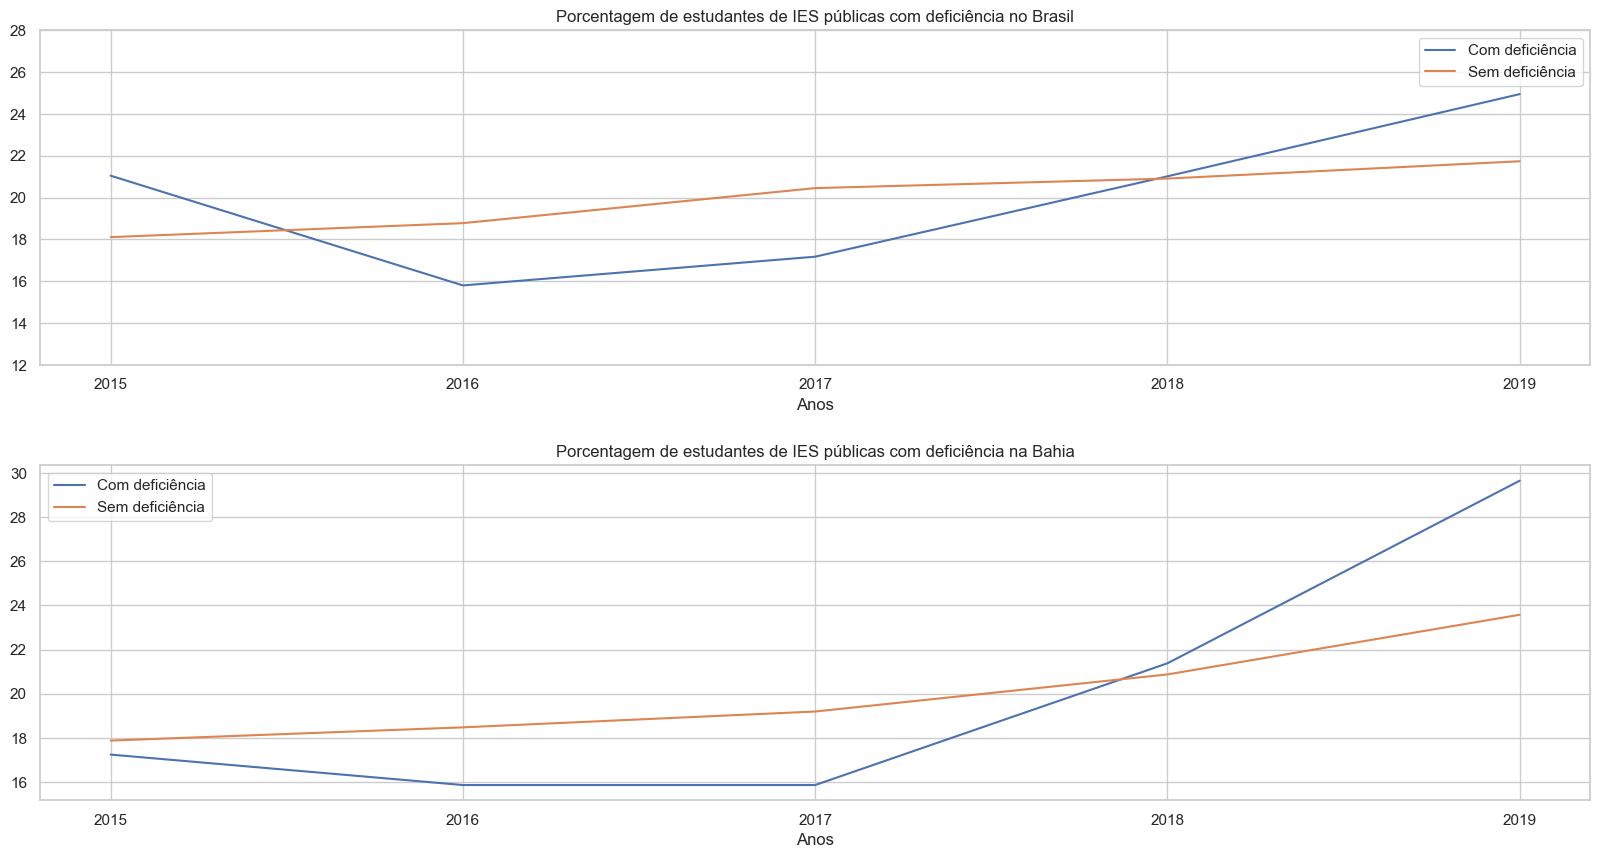

In [14]:
from matplotlib.pyplot import xticks, yticks

f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)

plot_def_brasil_def_unique.plot.line(x='Anos', xticks=[2015, 2016, 2017, 2018, 2019], yticks=[x for x in range(12, 30, 2)]
    ,title='Porcentagem de estudantes de IES públicas com deficiência no Brasil', ax=axes[0])

plot_def_ba_def_unique.plot.line(x='Anos', ax=axes[1], xticks=[2015, 2016, 2017, 2018, 2019],
    title='Porcentagem de estudantes de IES públicas com deficiência na Bahia')

In [63]:
def get_vetor_deficiencias(data, deficiencia, percentage=True):
    data = data.loc[(data[deficiencia] == 1)]
    new_group = data.groupby(['NU_ANO_CENSO'])[deficiencia].value_counts()
    # indexes = list(zip(*new_group.index))
    if(sum(new_group.values) > 0):
        if percentage:
            return new_group.values*100/sum(new_group.values)
        else:
            return new_group.values
    else:
        return 0

def get_df_multi_column_line(data_BA:pd.DataFrame, data_br:pd.DataFrame, columns, percentage):
    df_brasil = data_br.loc[(data_br.NU_ANO_CENSO >= 2015) &
                (data_br.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (data_br.TP_MODALIDADE_ENSINO == 1)
                ]
    dict_cat_br = {}
    dict_cat_ba = {}
    for categoria in columns:
        dict_cat_br[categoria] = get_vetor_deficiencias(df_brasil, categoria, percentage)
        dict_cat_ba[categoria] = get_vetor_deficiencias(data_BA, categoria, percentage)
    
    dict_cat_br['Anos'] = [x for x in range(2015, 2020)]
    dict_cat_ba['Anos'] = [x for x in range(2015, 2020)]

    plot_def_br = pd.DataFrame(dict_cat_br)
    print('dados Brasil')
    display(plot_def_br.head())

    plot_def_ba = pd.DataFrame(dict_cat_ba)
    print('dados BA')
    display(plot_def_ba.head())
    return plot_def_br, plot_def_ba

# Gráfico de deficiências - Brasil x BA

dados Brasil


IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_INTELECTUAL  \
0                15.562914              13.572854                   10.606061   
1                16.887417              15.419162                   12.727273   
2                17.715232              18.512974                   14.545455   
3                22.019868              23.502994                   25.454545   
4                27.814570              28.992016                   36.666667   

   IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  Anos  
0                   15.097540                17.804878  2015  
1                   19.974555                17.560976  2016  
2                   19.550466                20.000000  2017  
3                   21.543681                23.414634  2018  
4                   23.833757                21.219512  2019

dados BA


IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_INTELECTUAL  \
0                30.555556              17.948718                    7.142857   
1                22.222222              10.256410                   21.428571   
2                16.666667              15.384615                   21.428571   
3                13.888889              23.076923                   21.428571   
4                16.666667              33.333333                   28.571429   

   IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  Anos  
0                    6.896552                14.814815  2015  
1                   17.241379                11.111111  2016  
2                   13.793103                14.814815  2017  
3                   20.689655                25.925926  2018  
4                   41.379310                33.333333  2019

<AxesSubplot:title={'center':'Porcentagem de estudantes de IES públicas com deficiência na Bahia'}, xlabel='Anos', ylabel='%'>

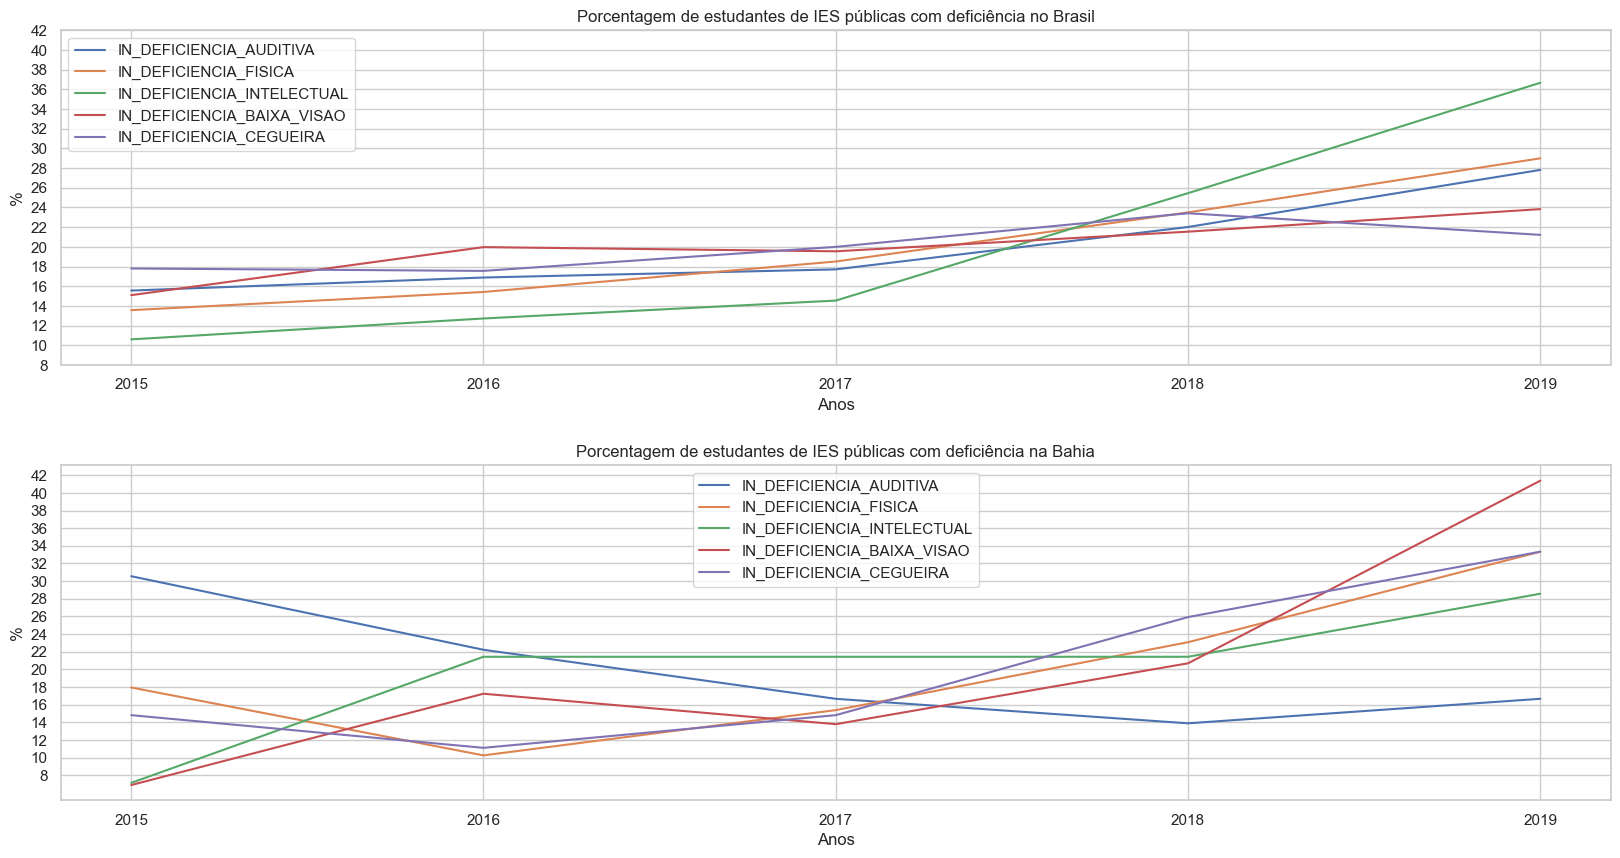

In [64]:
from matplotlib.pyplot import xticks, yticks

f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
y_ticks = [x for x in range(8, 43, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]
deficiencias_multiplas = [
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL',
    'IN_DEFICIENCIA_BAIXA_VISAO',
    'IN_DEFICIENCIA_CEGUEIRA',
   
]
plot_def_brasil, plot_def_ba = get_df_multi_column_line(curso_presencial_BA, curso_brasil, deficiencias_multiplas, True)

plot_def_brasil.plot.line(x='Anos', xticks=x_ticks, yticks=y_ticks, ylabel='%',
    title='Porcentagem de estudantes de IES públicas com deficiência no Brasil', ax=axes[0])

plot_def_ba.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, yticks=y_ticks, ylabel='%',
    title='Porcentagem de estudantes de IES públicas com deficiência na Bahia')

dados Brasil


IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_INTELECTUAL  \
0                       94                    272                          35   
1                      102                    309                          42   
2                      107                    371                          48   
3                      133                    471                          84   
4                      168                    581                         121   

   IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  Anos  
0                         356                       73  2015  
1                         471                       72  2016  
2                         461                       82  2017  
3                         508                       96  2018  
4                         562                       87  2019

dados BA


IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_INTELECTUAL  \
0                       11                      7                           1   
1                        8                      4                           3   
2                        6                      6                           3   
3                        5                      9                           3   
4                        6                     13                           4   

   IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  Anos  
0                           2                        4  2015  
1                           5                        3  2016  
2                           4                        4  2017  
3                           6                        7  2018  
4                          12                        9  2019

<AxesSubplot:title={'center':'Porcentagem de estudantes de IES públicas com deficiência na Bahia'}, xlabel='Anos'>

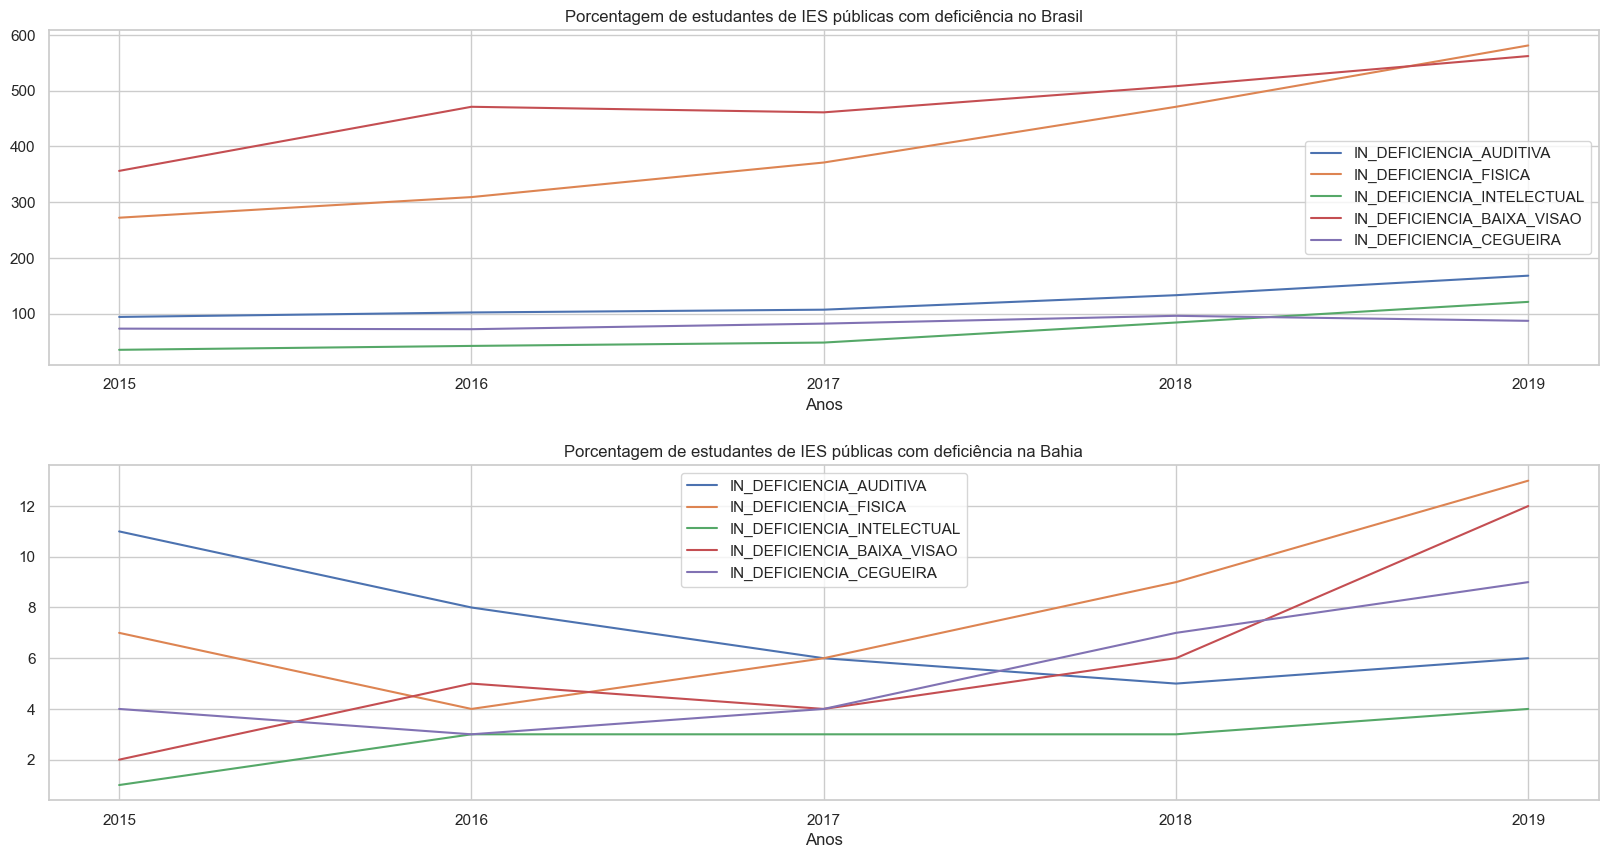

In [65]:
from matplotlib.pyplot import xticks, yticks

f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
x_ticks = [2015, 2016, 2017, 2018, 2019]
deficiencias_multiplas = [
     'IN_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL',
    'IN_DEFICIENCIA_BAIXA_VISAO',
    'IN_DEFICIENCIA_CEGUEIRA',
]
plot_def_brasil, plot_def_ba = get_df_multi_column_line(curso_presencial_BA, curso_brasil, deficiencias_multiplas, False)

plot_def_brasil.plot.line(x='Anos', xticks=x_ticks, 
    title='Porcentagem de estudantes de IES públicas com deficiência no Brasil', ax=axes[0])

plot_def_ba.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, 
    title='Porcentagem de estudantes de IES públicas com deficiência na Bahia')

IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_INTELECTUAL  \
0                       11                      7                           1   
1                        8                      4                           3   
2                        6                      6                           3   
3                        5                      9                           3   
4                        6                     13                           4   

   IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  Anos  
0                           2                        4  2015  
1                           5                        3  2016  
2                           4                        4  2017  
3                           6                        7  2018  
4                          12                        9  2019

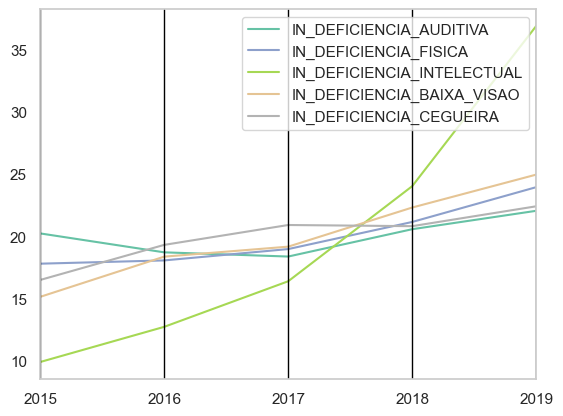

In [66]:
# libraries
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px
import numpy

display(plot_def_ba.head())
plot_def_ba.iloc[0]

dict_deficiencia = []
for deficiencia in deficiencias_multiplas:
    vetor_def = get_vetor_deficiencias(curso_brasil, deficiencia).tolist()
    vetor_def.append(deficiencia)
    dict_deficiencia.append(vetor_def)
    
df_parallel_br = pd.DataFrame(dict_deficiencia, columns=['2015', '2016', '2017', '2018', '2019', 'deficiencia'])
df_parallel_br.head()

# Make the plot
parallel_coordinates(df_parallel_br, 'deficiencia', colormap=plt.get_cmap("Set2"))
plt.show()

In [37]:
replace_categoria = {
    'TP_COR_RACA':{
        0: 'Não quis declarar',  
        1: 'Branca',
        2: 'Preta',
        3: 'Parda',
        4: 'Amarela',
        5: 'Indígena',
        9: 'Sem informação'
    },
    'TP_SEXO':{
        1:'Feminino',
        2:'Masculino'
    }
}

replace_categoria_en = {
    'TP_COR_RACA':{
        0: 'Didn\'t want to declare',  
        1: 'White',
        2: 'Black',
        3: 'Brown',
        4: 'Yellow',
        5: 'Indigenous',
        9: 'No information'
    },
    'TP_SEXO':{
        1:'Feminino',
        2:'Masculino'
    }
}

In [20]:
def get_vetor_categorias_r(data, column, categoria, percentage = True):
    new_group = []
    data = data.loc[(data[column] == categoria)]
    for i in range(2015, 2020):
        x = data.loc[data.NU_ANO_CENSO == i][column].value_counts().values
        print(x, column, categoria)
        if len(x) == 0:
            new_group.append(0)
        else:
            new_group.append(x[0])
    if percentage:
        print(new_group)
        return (new_group/sum(new_group))*100
    else:
        return new_group

def get_vetor_line_chart(data_ba:pd.DataFrame, data_brasil:pd.DataFrame, column_name, values, percentage=True):
    df_brasil = data_brasil.loc[(data_brasil.NU_ANO_CENSO >= 2015) &
                (data_brasil.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (data_brasil.TP_MODALIDADE_ENSINO == 1)
                ]
    dict_categoria_ba = {}
    dict_categoria_br = {}
    for categoria in values:
        dict_categoria_ba[categoria] = get_vetor_categorias_r(data_ba.replace(replace_categoria), column_name, categoria, percentage)
        # print(dict_categoria_ba[categoria] )
        dict_categoria_br[categoria] = get_vetor_categorias_r(df_brasil.replace(replace_categoria), column_name, categoria, percentage)
        
    dict_categoria_ba['Anos'] = [x for x in range(2015, 2020)]
    dict_categoria_br['Anos'] = [x for x in range(2015, 2020)]
    print()
    # print(dict_categoria_ba, dict_categoria_br)
    plot_def_ba_cor_raca = pd.DataFrame(dict_categoria_ba)
    plot_def_br_cor_raca = pd.DataFrame(dict_categoria_br)

    print('cor e raça na BA')
    display(plot_def_ba_cor_raca)
    print('cor e raça no brasil')
    display(plot_def_br_cor_raca)
    return plot_def_br_cor_raca, plot_def_ba_cor_raca

### Gráfico de linha cor/raça - Brasil x BA

[178] TP_COR_RACA Branca
[212] TP_COR_RACA Branca
[300] TP_COR_RACA Branca
[382] TP_COR_RACA Branca
[543] TP_COR_RACA Branca
[178, 212, 300, 382, 543]
[54565] TP_COR_RACA Branca
[60943] TP_COR_RACA Branca
[68196] TP_COR_RACA Branca
[71885] TP_COR_RACA Branca
[75227] TP_COR_RACA Branca
[54565, 60943, 68196, 71885, 75227]
[16] TP_COR_RACA Amarela
[17] TP_COR_RACA Amarela
[23] TP_COR_RACA Amarela
[22] TP_COR_RACA Amarela
[29] TP_COR_RACA Amarela
[16, 17, 23, 22, 29]
[2511] TP_COR_RACA Amarela
[2614] TP_COR_RACA Amarela
[2843] TP_COR_RACA Amarela
[2920] TP_COR_RACA Amarela
[3174] TP_COR_RACA Amarela
[2511, 2614, 2843, 2920, 3174]
[678] TP_COR_RACA Parda
[833] TP_COR_RACA Parda
[1060] TP_COR_RACA Parda
[1396] TP_COR_RACA Parda
[1551] TP_COR_RACA Parda
[678, 833, 1060, 1396, 1551]
[30272] TP_COR_RACA Parda
[35761] TP_COR_RACA Parda
[41130] TP_COR_RACA Parda
[45298] TP_COR_RACA Parda
[51190] TP_COR_RACA Parda
[30272, 35761, 41130, 45298, 51190]
[294] TP_COR_RACA Preta
[393] TP_COR_RACA Preta


Branca    Amarela      Parda      Preta  Não quis declarar   Indígena  \
0  11.021672  14.953271  12.287061  11.077619          23.705203  10.606061   
1  13.126935  15.887850  15.096049  14.807837          24.193356  27.272727   
2  18.575851  21.495327  19.209859  20.195931          20.300036  19.696970   
3  23.653251  20.560748  25.299021  24.340618          16.632932  19.696970   
4  33.622291  27.102804  28.108010  29.577995          15.168472  22.727273   

   Anos  
0  2015  
1  2016  
2  2017  
3  2018  
4  2019

cor e raça no brasil


Branca    Amarela      Parda      Preta  Não quis declarar   Indígena  \
0  16.494063  17.856635  14.864646  15.791274          27.460322  13.787263   
1  18.422023  18.589105  17.559943  18.435453          23.080375  18.055556   
2  20.614481  20.217608  20.196316  21.007632          18.375925  22.222222   
3  21.729602  20.765183  22.242955  22.919217          16.324470  23.373984   
4  22.739831  22.571469  25.136140  21.846425          14.758909  22.560976   

   Anos  
0  2015  
1  2016  
2  2017  
3  2018  
4  2019

Text(0.5, 0, 'Years')

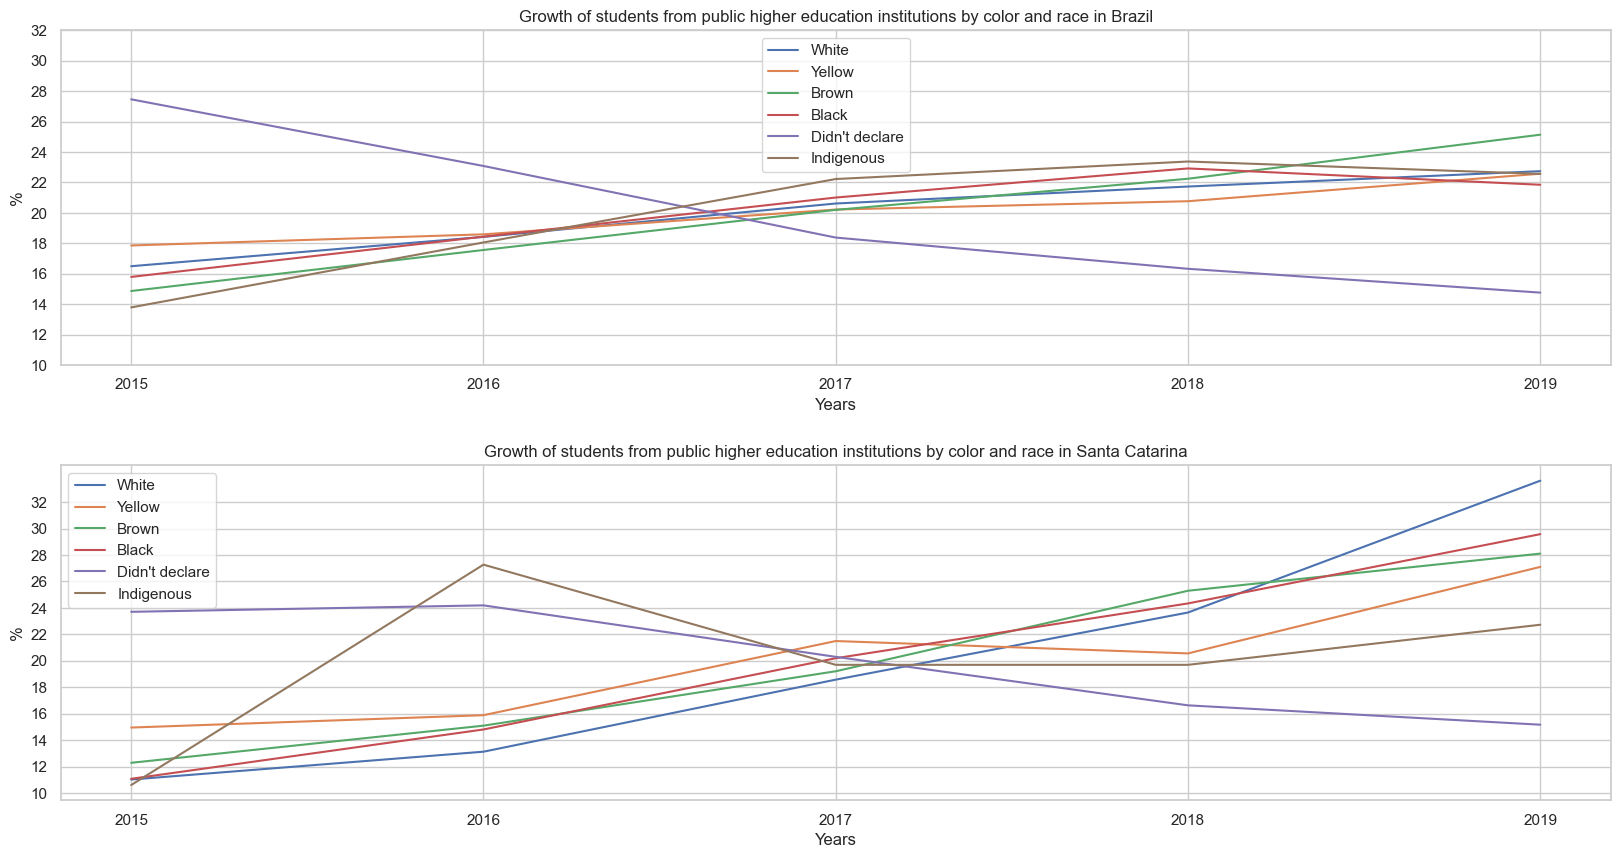

In [21]:
plot_def_br_cor_raca, plot_def_ba_cor_raca = get_vetor_line_chart(curso_presencial_BA, curso_brasil, 'TP_COR_RACA',
            ['Branca', 'Amarela', 'Parda', 'Preta', 'Não quis declarar', 'Indígena'],True)
# plot_def_br_cor_raca, plot_def_ba_cor_raca = get_vetor_line_chart(clsc_presencial, df, 'TP_COR_RACA',
#             ['Didn\'t want to declare', 'White','Black','Brown','Yellow','Indigenous','No information'],True)
#Plots
f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
y_ticks = [x for x in range(10, 33, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]
plot_def_br_cor_raca.plot.line(x='Anos', xticks=x_ticks, yticks=y_ticks,ylabel='%',
    # title='Crescimento de estudantes de IES públicas por cor e raça no Brasil',
    title='Growth of students from public higher education institutions by color and race in Brazil',
    ax=axes[0])
axes[0].legend(labels=['White','Yellow','Brown','Black','Didn\'t declare','Indigenous'])
axes[0].set_xlabel('Years')

plot_def_ba_cor_raca.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, yticks=y_ticks,ylabel='%',
    # title='Crescimento de estudantes de IES públicas por cor e raça em Santa Catarina'
    title='Growth of students from public higher education institutions by color and race in Santa Catarina'
    )
axes[1].legend(labels=['White','Yellow','Brown','Black','Didn\'t declare','Indigenous'])
axes[1].set_xlabel('Years')

[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA Didn't want to declare
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA White
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Black
[] TP_COR_RACA Brown
[] TP_COR_RACA Brown
[] TP_COR_RACA Brown
[] TP_COR_RACA Brown
[] TP_COR_RACA Brown
[] TP_COR_RACA Brown
[] TP_COR_RACA Brown
[] TP_COR_RACA Brown
[] TP_COR_RACA Brown
[] TP_COR_R

Didn't want to declare  White  Black  Brown  Yellow  Indigenous  \
0                       0      0      0      0       0           0   
1                       0      0      0      0       0           0   
2                       0      0      0      0       0           0   
3                       0      0      0      0       0           0   
4                       0      0      0      0       0           0   

   No information  Anos  
0               0  2015  
1               0  2016  
2               0  2017  
3               0  2018  
4               0  2019

cor e raça no brasil


Didn't want to declare  White  Black  Brown  Yellow  Indigenous  \
0                       0      0      0      0       0           0   
1                       0      0      0      0       0           0   
2                       0      0      0      0       0           0   
3                       0      0      0      0       0           0   
4                       0      0      0      0       0           0   

   No information  Anos  
0               0  2015  
1               0  2016  
2               0  2017  
3               0  2018  
4               0  2019

<AxesSubplot:title={'center':'Crescimento de estudantes de IES públicas por cor e raça na Bahia'}, xlabel='Anos'>

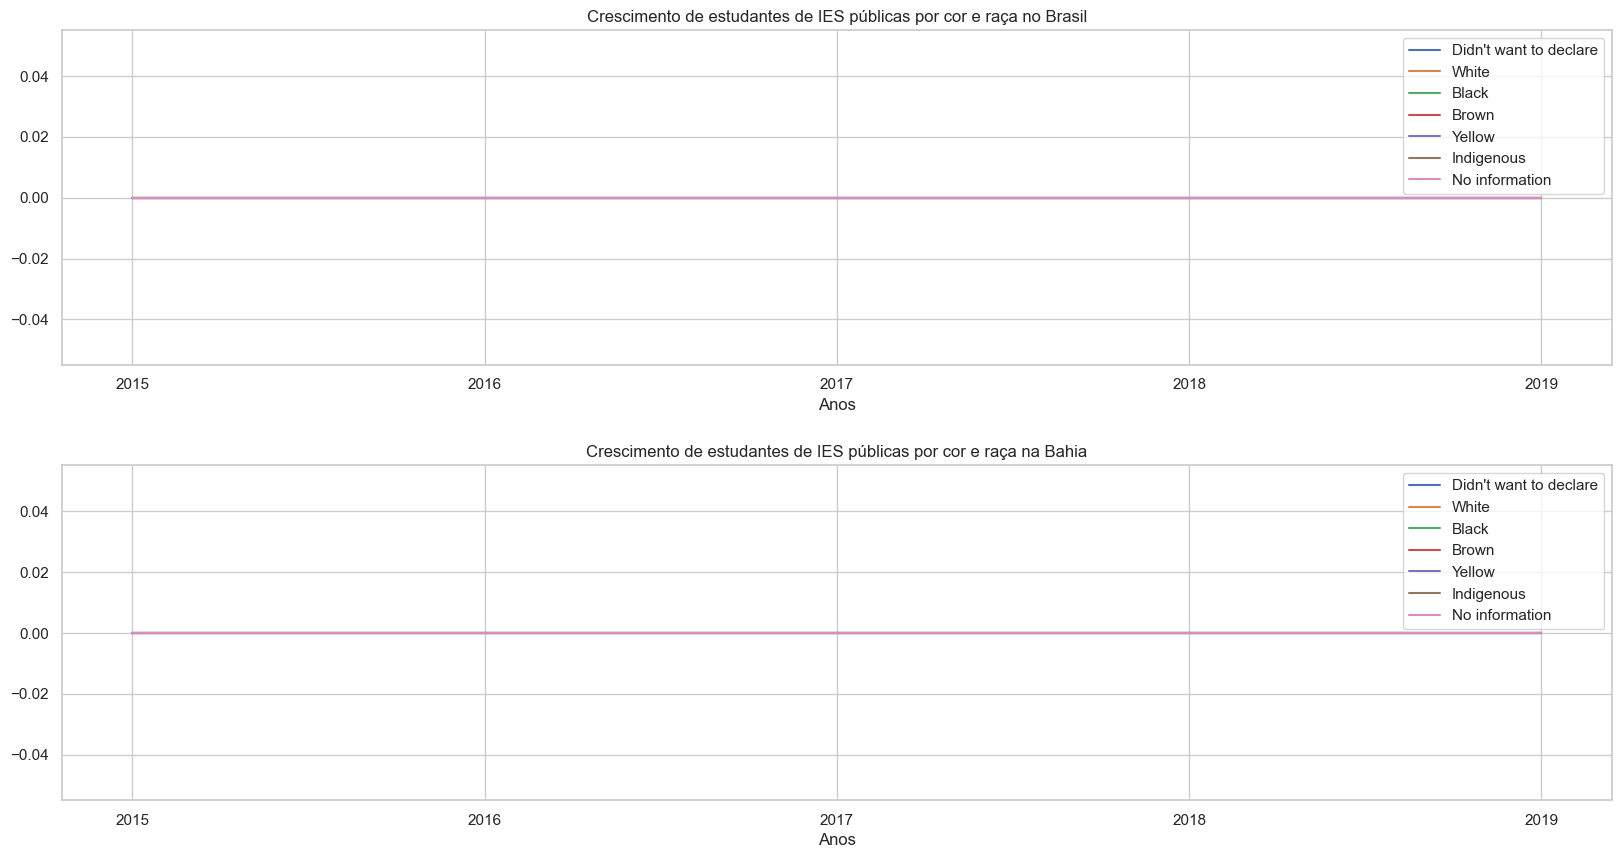

In [22]:
plot_def_br_cor_raca, plot_def_ba_cor_raca = get_vetor_line_chart(curso_presencial_BA, curso_brasil, 'TP_COR_RACA',
            ['Didn\'t want to declare', 'White','Black','Brown','Yellow','Indigenous','No information'],False)
#Plots
f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
# y_ticks = [x for x in range(10, 33, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]

plot_def_br_cor_raca.plot.line(x='Anos', xticks=x_ticks,
    title='Crescimento de estudantes de IES públicas por cor e raça no Brasil', ax=axes[0])

plot_def_ba_cor_raca.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, 
    title='Crescimento de estudantes de IES públicas por cor e raça na Bahia')

### Gráfico de linha sexo - Brasil x BA

[594] TP_SEXO Feminino
[656] TP_SEXO Feminino
[647] TP_SEXO Feminino
[650] TP_SEXO Feminino
[692] TP_SEXO Feminino
[594, 656, 647, 650, 692]
[23608] TP_SEXO Feminino
[23975] TP_SEXO Feminino
[24608] TP_SEXO Feminino
[25229] TP_SEXO Feminino
[26370] TP_SEXO Feminino
[23608, 23975, 24608, 25229, 26370]
[2596] TP_SEXO Masculino
[2866] TP_SEXO Masculino
[2998] TP_SEXO Masculino
[3210] TP_SEXO Masculino
[3505] TP_SEXO Masculino
[2596, 2866, 2998, 3210, 3505]
[109965] TP_SEXO Masculino
[115460] TP_SEXO Masculino
[122899] TP_SEXO Masculino
[128165] TP_SEXO Masculino
[133755] TP_SEXO Masculino
[109965, 115460, 122899, 128165, 133755]

cor e raça na BA


Feminino  Masculino  Anos
0  18.338994  17.107084  2015
1  20.253165  18.886326  2016
2  19.975301  19.756178  2017
3  20.067922  21.153213  2018
4  21.364619  23.097199  2019

cor e raça no brasil


Feminino  Masculino  Anos
0  19.071007  18.019841  2015
1  19.367477  18.920301  2016
2  19.878827  20.139321  2017
3  20.380483  21.002255  2018
4  21.302205  21.918282  2019

<AxesSubplot:title={'center':'Crescimento de estudantes de IES públicas por sexo na Bahia'}, xlabel='Anos'>

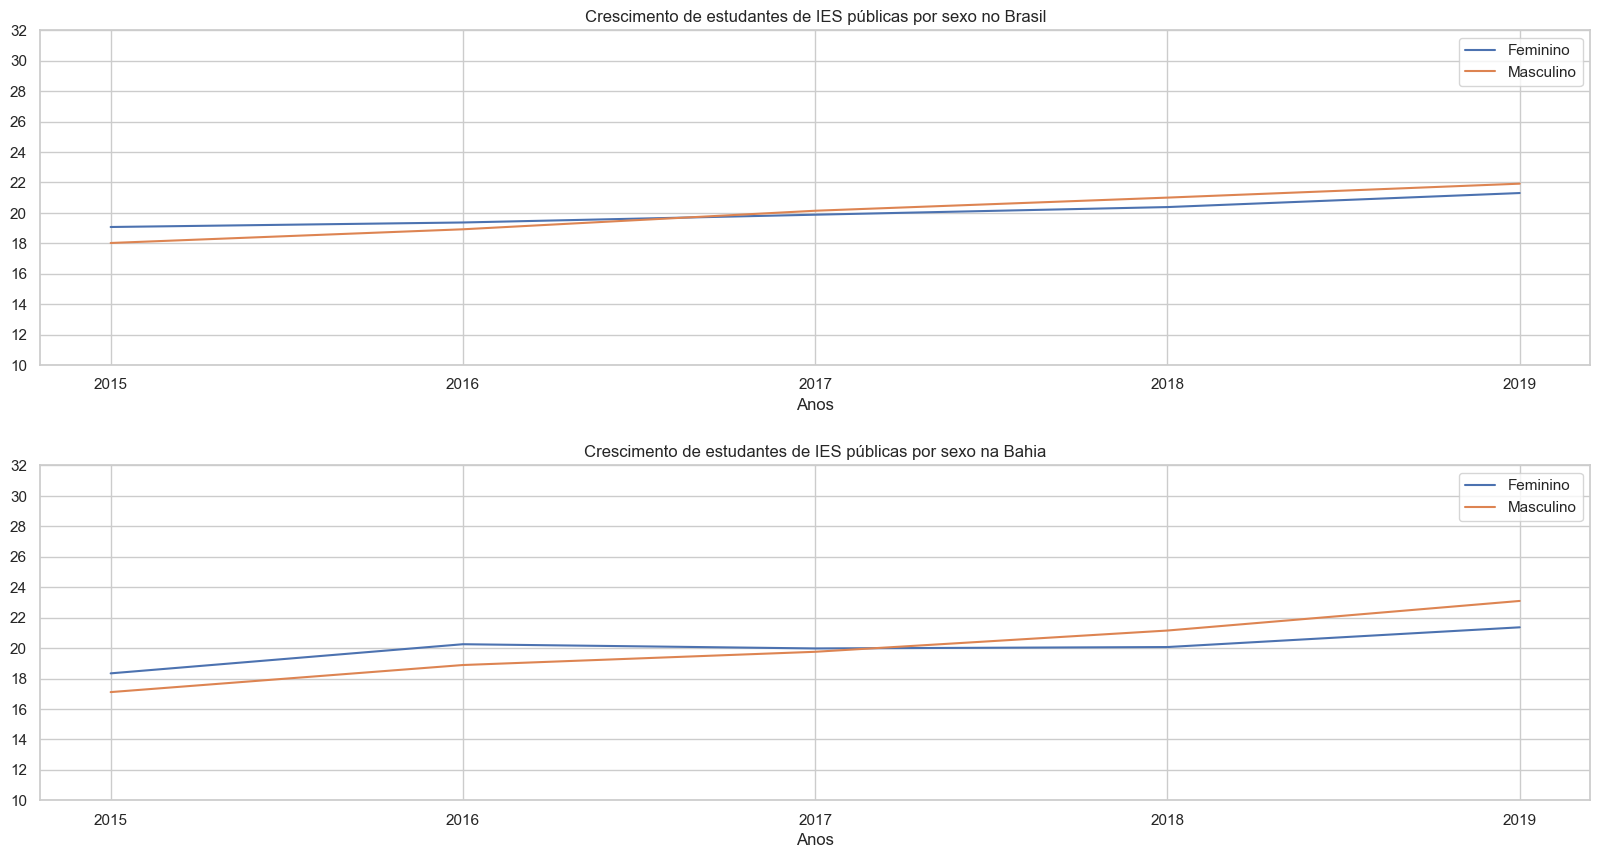

In [23]:
plot_def_br, plot_def_ba = get_vetor_line_chart(curso_presencial_BA, curso_brasil, 'TP_SEXO',
            ['Feminino', 'Masculino'],True)
#Plots
f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
y_ticks = [x for x in range(10, 33, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]

plot_def_br.plot.line(x='Anos', xticks=x_ticks, yticks=y_ticks
    ,title='Crescimento de estudantes de IES públicas por sexo no Brasil', ax=axes[0])

plot_def_ba.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, yticks=y_ticks,
    title='Crescimento de estudantes de IES públicas por sexo na Bahia')

[594] TP_SEXO Feminino
[656] TP_SEXO Feminino
[647] TP_SEXO Feminino
[650] TP_SEXO Feminino
[692] TP_SEXO Feminino
[23608] TP_SEXO Feminino
[23975] TP_SEXO Feminino
[24608] TP_SEXO Feminino
[25229] TP_SEXO Feminino
[26370] TP_SEXO Feminino
[2596] TP_SEXO Masculino
[2866] TP_SEXO Masculino
[2998] TP_SEXO Masculino
[3210] TP_SEXO Masculino
[3505] TP_SEXO Masculino
[109965] TP_SEXO Masculino
[115460] TP_SEXO Masculino
[122899] TP_SEXO Masculino
[128165] TP_SEXO Masculino
[133755] TP_SEXO Masculino

cor e raça na BA


Feminino  Masculino  Anos
0       594       2596  2015
1       656       2866  2016
2       647       2998  2017
3       650       3210  2018
4       692       3505  2019

cor e raça no brasil


Feminino  Masculino  Anos
0     23608     109965  2015
1     23975     115460  2016
2     24608     122899  2017
3     25229     128165  2018
4     26370     133755  2019

<AxesSubplot:title={'center':'Crescimento de estudantes de IES públicas por sexo na Bahia'}, xlabel='Anos'>

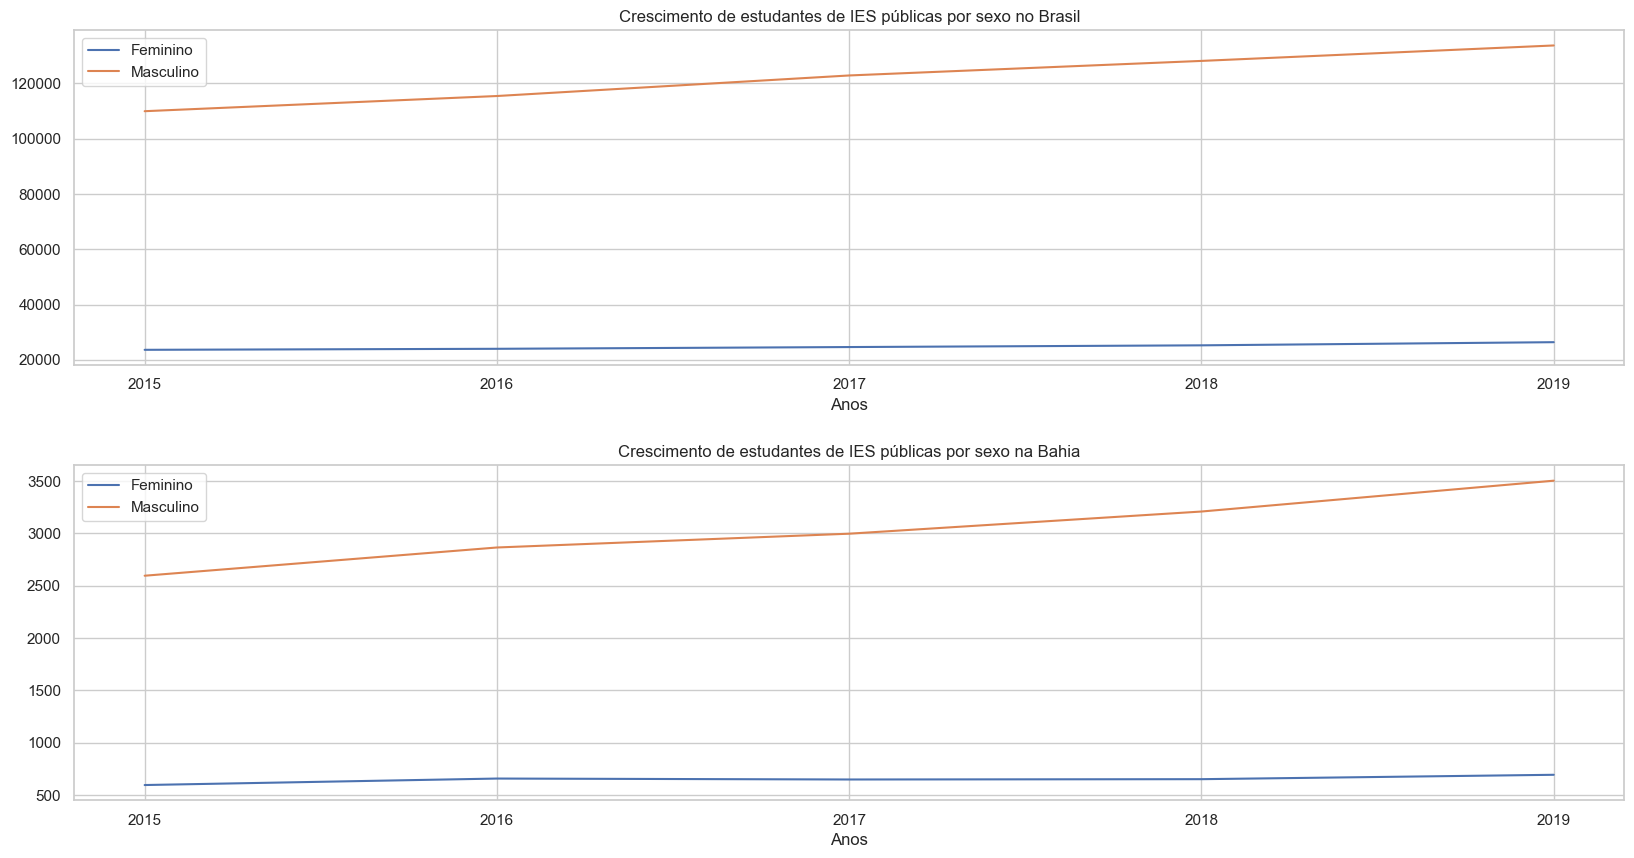

In [24]:
plot_def_br, plot_def_ba = get_vetor_line_chart(curso_presencial_BA, curso_brasil, 'TP_SEXO',['Feminino', 'Masculino'],False)
#Plots
f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
x_ticks = [2015, 2016, 2017, 2018, 2019]

plot_def_br.plot.line(x='Anos', xticks=x_ticks, 
    title='Crescimento de estudantes de IES públicas por sexo no Brasil', ax=axes[0])

plot_def_ba.plot.line(x='Anos', ax=axes[1], xticks=x_ticks,
    title='Crescimento de estudantes de IES públicas por sexo na Bahia')

In [25]:
def create_dataframe_area_chart(data, columns):
    porcentagens = []
    categoria = []
    anos = data.Anos.tolist()*len(columns)

    for x in columns:
        for y in range(len(data.values)):
            categoria.append(x)
        for y in data[x]:
            porcentagens.append(y)
        
    df = pd.DataFrame({'porcentagem': porcentagens, 'ano': anos, 'categoria': categoria})
    display(df.head())
    return df

In [26]:
porcentagens = []
sexo = []
colum = ['Feminino', 'Masculino']
anos = plot_def_ba.Anos.tolist()*len(colum)

for x in colum:
    for y in range(len(plot_def_ba.values)):
        sexo.append(x)
    for y in plot_def_ba[x]:
        porcentagens.append(y)
    
df_sc_area_chart = pd.DataFrame({'porcentagem': porcentagens, 'ano': anos, 'sexo': sexo})
df_sc_area_chart.head()

porcentagem   ano      sexo
0          594  2015  Feminino
1          656  2016  Feminino
2          647  2017  Feminino
3          650  2018  Feminino
4          692  2019  Feminino

In [27]:
import plotly.express as px

fig = px.area(create_dataframe_area_chart(plot_def_br, columns=['Feminino', 'Masculino']),
              x="ano", y="porcentagem", color="categoria", line_group="categoria",
              title='Crescimento percentual de homens e mulheres no Brasil')
fig.show()

porcentagem   ano categoria
0        23608  2015  Feminino
1        23975  2016  Feminino
2        24608  2017  Feminino
3        25229  2018  Feminino
4        26370  2019  Feminino

In [30]:
fig = px.area(create_dataframe_area_chart(plot_def_ba, columns=['Feminino', 'Masculino']),
              x="ano", y="porcentagem", color="categoria", line_group="categoria",
              title='Crescimento percentual de homens e mulheres na Bahia')
fig.show()

porcentagem   ano categoria
0          594  2015  Feminino
1          656  2016  Feminino
2          647  2017  Feminino
3          650  2018  Feminino
4          692  2019  Feminino

In [31]:
'''fig = px.area(create_dataframe_area_chart(plot_def_ba_cor_raca,
            columns=['Branca', 'Amarela', 'Parda', 'Preta', 'Aluno não quis declarar', 'Indígena']),
            x="ano", y="porcentagem", color="categoria",
            title='Crescimento percentual de homens e mulheres na Bahia')
fig.show()'''

'fig = px.area(create_dataframe_area_chart(plot_def_ba_cor_raca,\n            columns=[\'Branca\', \'Amarela\', \'Parda\', \'Preta\', \'Aluno não quis declarar\', \'Indígena\']),\n            x="ano", y="porcentagem", color="categoria",\n            title=\'Crescimento percentual de homens e mulheres na Bahia\')\nfig.show()'

In [32]:
# library
import numpy as np

import matplotlib.pyplot as plt

### Gráficos de calor - relacionando diversidades

In [33]:
def get_vetor_categorias_2(data, categoria_1, v_categorias_1, categoria_2, v_categorias_2, percentage=True):
    vetor = []
    for c1 in v_categorias_1:
        data_cat = data.loc[(data[categoria_1] == c1)]
        for c2 in v_categorias_2:
            v = data_cat.loc[(data_cat[categoria_2] == c2)].size
            vetor.append(v)
    return vetor
    
def gera_heatmap_anos(base_dados_n1, categoria_1, v_categorias_1, categoria_2, v_categorias_2, percentage=True):
    vetor = get_vetor_categorias_2(base_dados_n1, categoria_1, v_categorias_1, categoria_2, v_categorias_2, percentage=True)
    tam = len(v_categorias_2)

    x = np.array(np.tile(v_categorias_2, 2))
    y = np.array(np.repeat(v_categorias_1, tam))
    z = np.array(vetor)
    print(x, y, z)
    dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)
    dfn1_n2.columns = ['Cor e Raça','Gênero','Evasão']
    dfn1_n2['Evasão'] = pd.to_numeric(dfn1_n2['Evasão'])
    pivotted_n1_n2= dfn1_n2.pivot('Cor e Raça','Gênero','Evasão')

    plt.figure(figsize=(16,9))
    plt.title("Taxa de Evasão Por Gênero e Cor e Raça no Ensino Superior")


    pivotted_n1_n2.index = pd.CategoricalIndex(pivotted_n1_n2.index, categories= v_categorias_2)
    pivotted_n1_n2.sort_index(level=0, inplace=True)
    sns.heatmap(pivotted_n1_n2,annot=True, linewidths=4)
    return pivotted_n1_n2

def gera_heatmap_apenas(base_dados_n1:pd.DataFrame, base_dados_n2, v_categorias_1):
    tam = len(v_categorias_1)

    x = np.array(np.tile(v_categorias_1, 2))
    y = np.array(np.repeat(v_categorias_1, tam))
    z = np.array(base_dados_n1.drop(columns=['Anos'].values))

    dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)
    dfn1_n2.columns = ['Categoria','Gênero','Quantidade']
    dfn1_n2['Quantidade'] = pd.to_numeric(dfn1_n2['Quantidade'])
    pivotted_n1_n2= dfn1_n2.pivot('Categoria','Gênero','Quantidade')

    plt.figure(figsize=(16,9))
    plt.title("Taxa de Evasão Por Gênero e Categoria no Ensino Superior")


    pivotted_n1_n2.index = pd.CategoricalIndex(pivotted_n1_n2.index, categories= v_categorias_1)
    pivotted_n1_n2.sort_index(level=0, inplace=True)
    sns.heatmap(pivotted_n1_n2,annot=True, linewidths=4)
    return pivotted_n1_n2

['Não quis declarar' 'Branca' 'Preta' 'Parda' 'Amarela' 'Indígena'
 'Não quis declarar' 'Branca' 'Preta' 'Parda' 'Amarela' 'Indígena'] ['Feminino' 'Feminino' 'Feminino' 'Feminino' 'Feminino' 'Feminino'
 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Masculino'] [ 36720   3780   7884  14580    216    108 178308  15444  23868  58644
   1512    648]


Gênero             Feminino  Masculino
Cor e Raça                            
Não quis declarar     36720     178308
Branca                 3780      15444
Preta                  7884      23868
Parda                 14580      58644
Amarela                 216       1512
Indígena                108        648

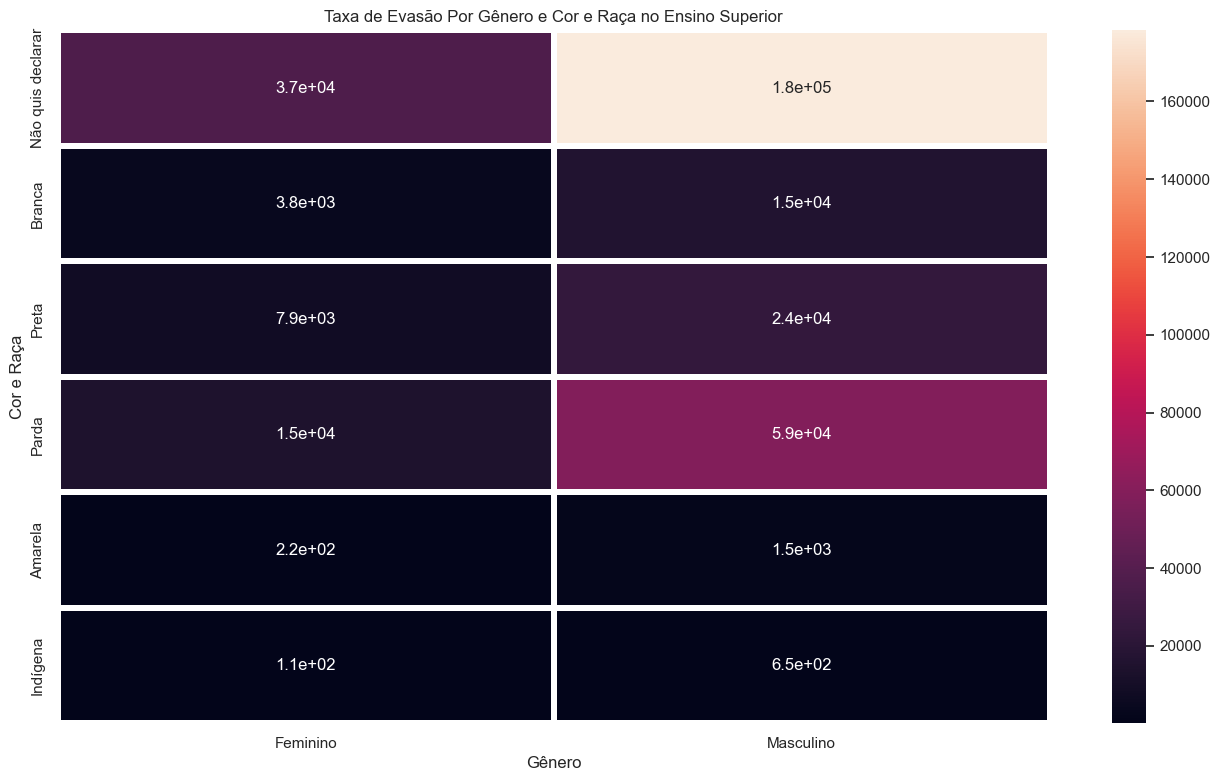

In [34]:
gera_heatmap_anos(curso_presencial_BA.replace(replace_categoria).loc[curso_presencial_BA.NU_ANO_CENSO == 2015], 'TP_SEXO', ['Feminino', 'Masculino'],
                  'TP_COR_RACA', ['Não quis declarar', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])

In [35]:
def get_df_personalize(data_ba:pd.DataFrame, data_br:pd.DataFrame, column1, columns1, column2, columns2, percentage=True):
    df_brasil = data_br.loc[(data_br.NU_ANO_CENSO >= 2015) &
                    (data_br.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                    (data_br.TP_MODALIDADE_ENSINO == 1)
                ]
    categoria_v = []
    for categoria in columns1:
        d1_ba = data_ba.loc[data_ba[column1] == categoria]
        for cat2 in columns2:
            print(categoria, cat2)
            d2_ba = get_vetor_categorias_r(d1_ba, column2, cat2)
            print(d2_ba)
    

deficiencias_multiplas = [
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL',
    'IN_TGD_SINDROME_ASPERGER',
]
get_df_personalize(curso_presencial_BA.replace(replace_categoria), curso_brasil, 'IN_DEFICIENCIA_FISICA', [1], 'TP_SEXO', ['Feminino','Masculino'])


1 Feminino
[2] TP_SEXO Feminino
[2] TP_SEXO Feminino
[1] TP_SEXO Feminino
[2] TP_SEXO Feminino
[4] TP_SEXO Feminino
[2, 2, 1, 2, 4]
[18.18181818 18.18181818  9.09090909 18.18181818 36.36363636]
1 Masculino
[5] TP_SEXO Masculino
[2] TP_SEXO Masculino
[5] TP_SEXO Masculino
[7] TP_SEXO Masculino
[9] TP_SEXO Masculino
[5, 2, 5, 7, 9]
[17.85714286  7.14285714 17.85714286 25.         32.14285714]
